# DATA

In [1]:
%load_ext autoreload
%autoreload 2
import genericIO
import SepVector
import Hypercube
import numpy as np
import Operator
import WEM

import __pyDaskVector as DaskVector
import __pyDaskOperator as DaskOperator
from dask_util import DaskClient

import time

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:

n1 = 300
n2 = 200 

d1 = 20
d2 = 10

o1 = 0
o2 = 0

slow = SepVector.getSepVector(Hypercube.hypercube(ns=[n1,n2],ds=[d1,d2],os=[o1,o2]),storage='dataComplex')

slowNd = slow.getNdArray()
slowNd[:] = 1/2000*1/2000
slowNd[int(1.5*n2/3)::,:] = 1/3000*1/3000

den = slow.clone()
den.set(1)

complexVector
Axis 1: n=300	o=0.000000	d=20.000000
Axis 2: n=200	o=0.000000	d=10.000000

In [3]:
param = {
    "n_workers" : 10,
    "processes" : True,
}
client = DaskClient(local_params=param)

In [4]:
import gc
client.getClient().run(gc.collect)

{'tcp://127.0.0.1:33881': 52,
 'tcp://127.0.0.1:34105': 52,
 'tcp://127.0.0.1:36675': 52,
 'tcp://127.0.0.1:37287': 52,
 'tcp://127.0.0.1:39453': 52,
 'tcp://127.0.0.1:42893': 52,
 'tcp://127.0.0.1:44605': 52,
 'tcp://127.0.0.1:45785': 52,
 'tcp://127.0.0.1:45789': 52,
 'tcp://127.0.0.1:46875': 52}

In [5]:
slowDask = DaskVector.DaskVector(client, from_vector=slow, chunks=(1,1))
denDask = DaskVector.DaskVector(client, from_vector=den, chunks=(1,1))

In [6]:
slowDask.fut

[<Future: finished, type: SepVector.complexVector, key: window-52a8b182-b0e0-4fbb-b663-215c3c91b946>]

In [7]:
from __pyDaskVector import DaskSuperVector
modelDask = DaskSuperVector(slow, den)

In [8]:
modelDask.cls

pyVector.superVector

In [9]:
modelDask[0][:]

array([[2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j, ...,
        2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j],
       [2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j, ...,
        2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j],
       [2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j, ...,
        2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j],
       ...,
       [1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j, ...,
        1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j],
       [1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j, ...,
        1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j],
       [1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j, ...,
        1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j]],
      dtype=complex64)

In [10]:
mm = modelDask.clone()

In [11]:
mm.set(1)

In [12]:
slow[:]

array([[2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j, ...,
        2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j],
       [2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j, ...,
        2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j],
       [2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j, ...,
        2.5000000e-07+0.j, 2.5000000e-07+0.j, 2.5000000e-07+0.j],
       ...,
       [1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j, ...,
        1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j],
       [1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j, ...,
        1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j],
       [1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j, ...,
        1.1111111e-07+0.j, 1.1111111e-07+0.j, 1.1111111e-07+0.j]],
      dtype=complex64)

In [13]:
from pyVector import superVector
isinstance(modelDask, superVector)

True

In [14]:
import json

ns = 10
par = {
    "ns" : ns,
    "dsx" : 100,
    "osx" : 0,
    "dsz" : 0,
    "osz" : 50,
    
    "nr" : 201,
    "drx" : 20,
    "orx" : 0,
    "drz" : 0,
    "orz" :  0,
    
    "fmin" : 1, 
    "fmax" : 15,

    "nfreq" : 10,
    
    "nref" : 1,
    "tap" : 100,
    "pad" : 100,
    "ngs" : 0,
    "ngr" : 0,
    "prop" : 'ssf',
    "eps" : 0.01,
    
    "ntaylor" : 1,
    "onepass" : 0,
    "cmap" : 0,
    
}


ot = 0
tmax = 3
dt = 0.004
nt = int((tmax-ot) / dt)
wave = SepVector.getSepVector(Hypercube.hypercube(ns=[nt],ds=[dt],os=[ot]))
waveNd = wave.getNdArray()
t = np.linspace(ot,tmax,nt) - .5
f0 = 5
waveNd[:] = (1-2*(np.pi*f0*t)**2)* np.exp(-(np.pi*f0*t)**2)
print(waveNd.shape)
# waveNd = np.roll(waveNd,-int(0.5/dt))

data = SepVector.getSepVector(ns=[nt,par["nr"],par["ns"]],ds=[dt,par["drx"],par["dsx"]],os=[ot,par["orx"],par["osx"]])
datNd = data.getNdArray()

pythonPar = genericIO.pythonParams(par)

(750,)


In [15]:
data.shape

(10, 201, 750)

In [16]:
dataDask = DaskVector.DaskVector(client, from_vector=data, chunks=(1,1,10))

In [17]:
dataDask.fut

[<Future: finished, type: SepVector.floatVector, key: window-16f77eba-c8a8-4fe1-8d66-ee96aee4ff0f>,
 <Future: finished, type: SepVector.floatVector, key: window-23963c00-d2c9-4b00-986d-be6e8d4fa9ce>,
 <Future: finished, type: SepVector.floatVector, key: window-c3118ede-c5ad-4612-a365-bbbe2e6e0f4d>,
 <Future: finished, type: SepVector.floatVector, key: window-4ea41c54-bf3f-4e40-bd5b-92a795f7534c>,
 <Future: finished, type: SepVector.floatVector, key: window-d67bc19d-9181-4dcf-b813-a126d738791d>,
 <Future: finished, type: SepVector.floatVector, key: window-768dddc4-de55-4c12-bf75-58fdbce85480>,
 <Future: finished, type: SepVector.floatVector, key: window-684f36c2-e245-483a-95e4-00d5b798c850>,
 <Future: finished, type: SepVector.floatVector, key: window-88d80de3-4f7d-4ca7-93f8-9f84cfba0180>,
 <Future: finished, type: SepVector.floatVector, key: window-82cbbee9-5fc9-4245-8859-1c6af273acbe>,
 <Future: finished, type: SepVector.floatVector, key: window-a847780e-0021-4fb9-81f5-eb3133f1eb26>]

In [18]:
dask_wem = DaskOperator.DaskOperator(client, WEM.WEM, modelDask, dataDask, wave, pythonPar)

In [19]:
dask_wem.get_futures()

[<Future: pending, key: from_subspace-cdc43303-869e-4003-bacd-320c15fb74f7>,
 <Future: pending, key: from_subspace-a9486da7-fa5b-4311-9a1c-8e19b76b65af>,
 <Future: pending, key: from_subspace-5120f2c1-71a0-450c-a222-8168ac81878b>,
 <Future: pending, key: from_subspace-6e873c1c-e2a1-4028-9baa-eca79895f744>,
 <Future: pending, key: from_subspace-87b42628-a94c-4f7c-b54e-50cb767f445d>,
 <Future: pending, key: from_subspace-fa7f5427-be05-4aa0-aaf3-06fbaa863072>,
 <Future: pending, key: from_subspace-45dc2318-10ce-4fd7-8046-1c45a44efb32>,
 <Future: pending, key: from_subspace-177e1333-0118-498d-bc4b-34098c2a9e95>,
 <Future: pending, key: from_subspace-1ffa48b5-aaa6-416f-a6c0-b45db3f71311>,
 <Future: pending, key: from_subspace-72dc61f7-79cb-4b9f-9d46-15493f24830a>]

In [20]:
slow.getNdArray().nbytes/1e6 * 2

fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 1; nrec = 201


0.96

In [21]:
for _ in range(10):
    dask_wem.forward(False, modelDask, dataDask)

/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.9/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is z

Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
4.46888 s
4.63093 s
4.64179 s
4.30817 s
4.21844 s
3.94497 s
4.74553 s
4.12748 s
4.30592 s
4.07887 s
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... Propagating shots ... 

Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
4.34269 s
4.32966 s
4.14631 s
4.46399 s
4.58203 s
4.89611 s
4.51586 s
4.96318 s
5.24634 s
5.2092 s
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
4.89632 s
5.10643 s
5.28964 s
5.3388 s
5.44025 s
5.50551 s
5.44233 s
5.64047 s
5.5258 s
5.58033 s
Propagating shots ... 
Propagating s

KeyboardInterrupt: 

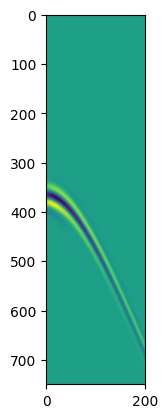

In [21]:
import matplotlib.pyplot as plt

s1 = dataDask[0,:,:][0]

plt.imshow(s1.T)

In [22]:
dataDask.norm()

210929.11480144004

In [23]:
imageDask = modelDask.clone()
dask_born = DaskOperator.DaskOperator(client, WEM.Born, modelDask, dataDask, wave,pythonPar)

fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 4; nrec = 201


In [ ]:
imageDask.zero()
imageDask.vecs[0][100,100] = 1
dask_born.forward(False, imageDask, dataDask)

fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
Forward born ... 


In [31]:
dask_born.adjoint(False, imageDask, dataDask)

Adjoint born ... 
Adjoint born ... 
Adjoint born ... 
Adjoint born ... 
213.807 s
214.018 s
214.047 s
269.099 s


In [32]:
imageDask.norm()

37974.08984375

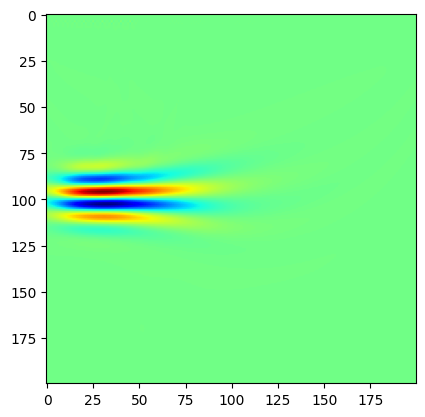

In [37]:
plt.imshow(imageDask.vecs[0][:].real, cmap='jet')

## Test FWI

In [24]:
par  = {
    "pre" : {
        "ns" : [[51,51], [51,51]],
        "type" : ["CR-spline", "CR-spline"],
        "niter" : 50,
    }
}

In [45]:
import numpy as np
import SepVector
import Hypercube
import genericIO
import WEM
import Operator

import pyVector as Vec
import pyOperator as Op
import pyNonLinearSolver as Solver
import pyLinearSolver as LinearSolver
import pyProblem as Prblm
import pyStopper as Stopper
from sys_util import logger
import json
import sys

import dask_util
from __pyDaskVector import DaskVector
from __pyDaskOperator import DaskOperator

model = DaskSuperVector(slow, den)
model_pre = model
vecs_pre = []
ops_pre = []
for i, mod in enumerate([slow, den]):
    ax = mod.getHyper().axes
    ns = par['pre']['ns'][i]
    ds = []
    for j in range(len(ns)):
        ds.append((ax[j].n-1)*ax[j].d / (ns[j] - 1))
    mod_pre = SepVector.getSepVector(Hypercube.hypercube(ns=ns,ds=ds,os=[ax[0].o,ax[1].o]),storage='dataComplex')
    mod_pre.zero()
    vecs_pre.append(mod_pre)

    if (par['pre']['type'][i] == 'lanczos'):
        int = Operator.LanczosInterpolation3D(mod_pre, mod, a=par['pre']['a'][i], taper=par['pre']['taper'][i])
    elif ('spline' in par['pre']['type'][i]):
        int = Operator.Spline2D(mod_pre, mod, type=par['pre']['type'][i])
    else:
        raise Exception('Unknown intepolation!')
    ops_pre.append(int)

int = Op.Dstack(*ops_pre)
model_pre = DaskSuperVector(*vecs_pre)
int.setDomainRange(model_pre, model)

intOp = Op.NonLinearOperator(int,int)
LinStop  = Stopper.BasicStopper(niter=par['pre']['niter'])
CGsolver = LinearSolver.LCGsolver(LinStop)
L2Prob = Prblm.ProblemL2Linear(model_pre,model,int)
CGsolver.setDefaults(iter_sampling=1,save_obj=False,save_res=False,save_grad=False,
            flush_memory=True,iter_buffer_size=1,save_model=False)
CGsolver.run(L2Prob,verbose=True)

##########################################################################################
				LINEAR CONJUGATE GRADIENT  SOLVER
	Restart folder: /tmp/restart_2023-04-20T18-43-16.377206/
	Modeling Operator:		 DStack 
##########################################################################################

iter = 00, obj = 2.00000e+04, resnorm = 2.00e+02, gradnorm = 8.08e+02, feval = 2
iter = 01, obj = 8.04703e-04, resnorm = 4.01e-02, gradnorm = 1.66e-01, feval = 4
iter = 02, obj = 4.07070e-08, resnorm = 2.85e-04, gradnorm = 5.05e-04, feval = 6
iter = 03, obj = 3.17464e-08, resnorm = 2.52e-04, gradnorm = 1.37e-04, feval = 8
iter = 04, obj = 3.15785e-08, resnorm = 2.51e-04, gradnorm = 7.11e-05, feval = 10
iter = 05, obj = 3.15645e-08, resnorm = 2.51e-04, gradnorm = 6.60e-05, feval = 12
iter = 06, obj = 3.15644e-08, resnorm = 2.51e-04, gradnorm = 6.49e-05, feval = 14
iter = 07, obj = 3.15627e-08, resnorm = 2.51e-04, gradnorm = 6.47e-05, feval = 16
iter = 08, obj = 3.15626e-08, resnorm =

In [44]:
d = dataDask.clone()
nlOp.nl_op.forward(False, model_pre, d)

AttributeError: 'superVector' object has no attribute 'get_futures'

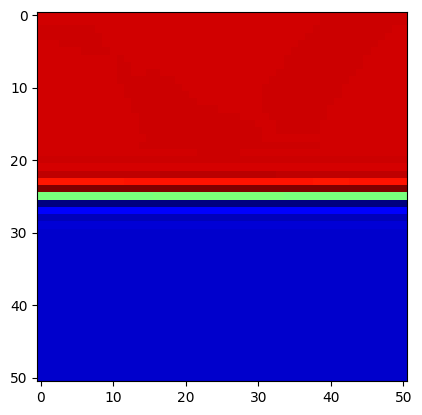

32.5063 s
32.5469 s
33.1389 s
2023-04-20 18:57:11,116 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/distributed/process.py", line 190, in _run
    target(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/distributed/nanny.py", line 988, in _run
    asyncio.run(run())
  File "/usr/lib/python3.9/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.9/asyncio/base_events.py", line 629, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
    self._run_once()
  File "/usr/lib/python3.9/asyncio/base_events.py", l

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files
WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


2023-04-20 18:57:11,769 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/distributed/process.py", line 190, in _run
    target(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/distributed/nanny.py", line 988, in _run
    asyncio.run(run())
  File "/usr/lib/python3.9/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.9/asyncio/base_events.py", line 629, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
    self._run_once()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 1854, in _run_once
    eve

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


41.6452 s
2023-04-20 18:57:20,287 - distributed.nanny - ERROR - Worker process died unexpectedly
Process Dask Worker process (from Nanny):
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.9/dist-packages/distributed/process.py", line 190, in _run
    target(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/distributed/nanny.py", line 988, in _run
    asyncio.run(run())
  File "/usr/lib/python3.9/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.9/asyncio/base_events.py", line 629, in run_until_complete
    self.run_forever()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
    self._run_once()
  File "/usr/lib/python3.9/asyncio/base_events.py", line 1854, in _run_on

WARNING! DATAPATH not found. The folder /tmp will be used to write binary files


In [50]:
import matplotlib.pyplot as plt
plt.imshow(model_pre[0][:].real, cmap='jet')

In [48]:
bornOp = DaskOperator(client, WEM.Born, modelDask,dataDask,wave,pythonPar)
wemOp = DaskOperator(client, WEM.WEM, modelDask,dataDask,wave,pythonPar)
nlOp = Op.NonLinearOperator(wemOp,bornOp)

# hyp = DaskOperator(client, Operator.HyperbolicPenalty, modelDask,modelDask,l=1,tau=1e-9)
# sofclip = DaskOperator(client, Operator.Softclip, modelDask,modelDask,l=1,tau=1e-9)
# hypOp = Op.NonLinearOperator(hyp,sofclip)
# nlOp = Op.CombNonlinearOp(hypOp,nlOp)

nlOp = Op.CombNonlinearOp(intOp,nlOp)


fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 4; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 2; nrec = 201
fmin = 1; fmax = 15.3525
nfreq = 44; from imin = 2 to imax = 45
nshots = 4; nrec = 201


In [51]:
dt = wave.getHyper().getAxis(1).d
tmax = (wave.getHyper().getAxis(1).n - 1)*dt + wave.getHyper().getAxis(1).o
der = DaskOperator(client, Operator.Derivative, modelDask,modelDask,which=1,order='exact',f0=1,tmax=tmax/2,dt=dt)

# Regularization operators
dsoNlOp = Op.NonLinearOperator(der,der)
dsoNlOp = Op.CombNonlinearOp(intOp,dsoNlOp)

2023-04-20 21:19:13,701 - distributed.core - ERROR - Exception while handling op scatter
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/distributed/core.py", line 820, in _handle_comm
    result = await result
  File "/usr/local/lib/python3.9/dist-packages/distributed/scheduler.py", line 5652, in scatter
    raise TimeoutError("No valid workers found")
asyncio.exceptions.TimeoutError: No valid workers found


TimeoutError: No valid workers found

In [49]:
Stop  = Stopper.BasicStopper(10)

L2Prob = Prblm.ProblemL2NonLinear(model_pre,dataDask,nlOp)
solver = Solver.NLCGsolver(Stop,beta_type='HZ')
solver.run(L2Prob, verbose=True)

##########################################################################################
			NON-LINEAR CONJUGATE GRADIENT SOLVER 
	Restart folder: /tmp/restart_2023-04-20T18-43-49.587145/
	Conjugate method used: HZ
##########################################################################################



Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
23.0764 s
23.1259 s
23.2691 s
29.3276 s
Adjoint born ... 
Adjoint born ... 
Adjoint born ... 
Adjoint born ... 
166.715 s
167.282 s
168.894 s
206.064 s
Forward born ... Forward born ... 

Forward born ... 
Forward born ... 


iter = 00, obj = 8.65545e+07, resnorm = 1.32e+04, gradnorm = 1.18e+16, feval = 1, geval = 1


136.515 s
137.931 s
138.909 s
173.371 s
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
31.0035 s
32.133 s
32.284 s
40.1506 s
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
33.4275 s
33.5423 s
33.7311 s
41.8988 s
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
31.4649 s
32.3282 s
32.3761 s
40.2405 s
Adjoint born ... 
Adjoint born ... 
Adjoint born ... 
Adjoint born ... 
146.95 s
147.253 s
148.302 s
233.301 s
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 
Propagating shots ... 


iter = 01, obj = 6.03183e+07, resnorm = 1.10e+04, gradnorm = 5.32e+15, feval = 4, geval = 2


KeyboardInterrupt: 

In [ ]:
pert = slow.clone()
pert.zero()
pert[100,50] = bg.min()

In [ ]:
a, err = nlOp.linTest(bg, pert=pert, alpha=np.linspace(1e-6, 1e-2, 10))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(a, err)

In [ ]:
wemOp.forward(False, slow, data)

In [ ]:
err

In [ ]:
a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sgn(x):
    return np.sign(x)

def f(omega):
    return -1j * (2/np.pi) * sgn(omega) * np.power(np.abs(omega), -3/2)

omega = np.linspace(-10, 10, 1000)
F = f(omega)

# plt.plot(omega, np.real(F), label='Real part')
plt.plot(np.imag(F)[450:550], label='Imaginary part')
plt.xlabel('Frequency (ω)')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of the Square Root Function')
plt.legend()
plt.show()


In [ ]:
ff = np.convolve(np.imag(F), -np.imag(F))
plt.plot(ff[950:1050])

In [ ]:
dask_born.set_background(bg)

## Spline interpolation

In [ ]:
import pyOperator as Op
import Operator
n1new = 50
d1new = (n1-1)*d1 / n1new 
n2new = 50
d2new = (n2-1)*d2 / n2new

smol = DaskVector(client, vecCls=SepVector.complexVector, ns=[n1new,n2new], ds=[d1new,d2new],os=[o1,o2], chunks=(1,1))

spline = DaskOperator(client, Operator.Spline2D, smol, slowDask,type='CR-spline')

# chain.adjoint(False,im_smol3d,data)

In [ ]:
chain = Op.ChainOperator(spline,dask_born)

In [ ]:
chain.adjoint(False, smol, dataDask)

In [ ]:
hv.Image(smol[:][0].real).opts(cmap='jet')

In [ ]:
smol = SepVector.getSepVector(ns=[n1new,n2new], ds=[d1new,d2new],os=[o1,o2], storage='dataComplex')
spline = Operator.Spline2D(smol, slow,type='CR-spline')

In [ ]:
import pickle

d = pickle.dumps(spline)

In [ ]:
dd = pickle.loads(d)

In [ ]:
dd.__dict__

In [ ]:
dd.adjoint(False, smol, slow)

In [ ]:
hv.Image(smol[:].real)

In [ ]:
smol.clipVector(smol,smol)